<img src="images/cads-logo.png" style="height: 100px;" align=left> <img src="images/python-logo.png" style="height: 100px;" align=right>

# Python Fundamentals Day 3

Welcome to Python Fundamentals Day 3.

So what is on the menu for today? 

We start with reading and writing from files, learn how to transport data objects in the JSON format and how to browse the filesystem.

Then we move to Exception handling. We learn about the different types of Exceptions, what they mean and how to resolve them. Then we learn how to handle Exceptions in our code using the try-except statement.

Last but not least, we learn about Object Oriented Programming including class inheritance and how to define and use your own classes in your coding.

Let's go!

## Table of Contents

- [File I/O](#File-I/O)
    - [Reading and writing lines with open](#Reading-and-writing-lines-with-open)
    - [JSON](#JSON)
    - [File browsing with glob](#File-browsing-with-glob)
    - [Summary](#Summary)
        - [open](#open)
        - [JSON](#JSON)
        - [import](#import)
        - [glob](#glob)
    - [RUN ME](#RUN-ME)
    - [Exercises](#Exercises)
        - [Exercise 1 - Read in stocks](#Exercise-1---Read-in-stocks)
        - [Exercise 2 - First ten names](#Exercise-2---First-ten-names)
        - [Exercise 3 - Inc only](#Exercise-3---Inc-only)
        - [Exercise 4 - Average PE](#Exercise-4---Average-PE)
- [Exception Handling](#Exception-Handling)
    - [Exceptions](#Exceptions)
    - [Try except](#Try-except)
    - [Summary](#Summary)
        - [try except](#try-except)
        - [try except else finally](#try-except-else-finally)
    - [RUN ME](#RUN-ME)
    - [Exercises](#Exercises)
        - [Exercise 1 - Fix it Multiply](#Exercise-1---Fix-it-Multiply)
        - [Exercise 2 - Fix it Numbers](#Exercise-2---Fix-it-Numbers)
        - [Exercise 3 - Fix it Open](#Exercise-3---Fix-it-Open)
        - [Exercise 4 - Try salaries](#Exercise-4---Try-salaries)
- [Object Oriented Programming](#Object-Oriented-Programming)
    - [Summary](#Summary)
        - [class](#class)
    - [RUN ME](#RUN-ME)
    - [Exercises](#Exercises)
        - [Exercise 1 - Get pokemon info](#Exercise-1---Get-pokemon-info)
        - [Exercise 2 - Create a pokemon class](#Exercise-2---Create-a-pokemon-class)
        - [Exercise 3 -  Load all pokemons](#Exercise-3----Load-all-pokemons)
        - [Exercise 4 - Provide insights](#Exercise-4---Provide-insights)

##### Jamboard (exercise by student)
https://jamboard.google.com/u/0/d/1reU32pxyWc0ytvwASUJTuUio7PjwePoEeimD_zItnN4/viewer?usp=sharing

## File I/O

### Reading and writing lines with open

Communicating with files is quite useful in programming.

With the `open()` built-in function we can read, write and append to files.

First check what is your working directory. You will be able to find the file that we will read and write there.

In [1]:
%pwd #print working directory

'C:\\Users\\Faiz\\Desktop\\UM Lecture\\CADS\\02 Python Basic 3days'

We now create a file object which we will use to write something to file.

In [7]:
f = open('test.txt','w')
f.write("Hey!")

# return 4 character 

4

Now check the file in your folder. Can you see Hey! in test.txt? 

No you cannot. Yet..

In [8]:
f.close()

Check test.txt again. 

Now it is there.

So it is important to <u>not forget to close</u> the file object.

There is an elegant construct for this. Let's try it.

In [11]:
with open('test2.txt','w') as f:
    f.write("Hello!")

Check again. Test test2.txt file is there.

So what did we do here?

`open()` returns a file object and it is commonly used with two arguments: `open(file, mode)`

- file is a string containing the filename
- mode describes in which way the file will be used: writing, reading, appending.

mode can be:
- `'r'` read (by default)
- `'w'` write
- `'a'` append

Notice the fat-green `with` as statement. Within the `with` statement the file object will be available as `f`. After the statement the file object will be closed. 

In [15]:
with open('test2.txt', 'r') as f:
    print(f.read())

Hello!


In [23]:
with open('test2.txt', 'a') as f:
    f.write("\n")
    f.write("Hello!")

Now we can check the contents of the file using 

`!cat` -- for Mac / Linux users

`!type` -- for Windows users

In [25]:
!type test2.txt

# can also type this in cmd in windows

Hello!Hello!
Hello!


In [43]:
text = """
The names are:

Jeremy    
Jan
Akmal    
""".strip() #strip removes the extra space at the beginning and end including \n
text

'The names are:\n\nJeremy    \nJan\nAkmal'

In [39]:
import os
file_names = os.path.join("data","names_raw.txt") # to make sure the path works for all OS (windows, mac,linux etc)
file_names

'data\\names_raw.txt'

The import statement allows you to import libraries which you can use. 

Here we use os.path.join to safely join the paths of the data folder and the names_raw. txt file so that it works for any operating system (Windows/Mac).

You can iterate over the file object and do something line by line.

In [40]:
with open(file_names,"r") as f:
    for line in f:
        print(line)

The names are:



Jeremy

Jan

Akmal


Let's say now we want to transform this file into a list of names. 

**Question:** How can we transform this into a list of the names?
<br>
**Answer:** read the first line and do nothing. Loop over the other lines and ignore empty lines and strip trailing

In [41]:
newlist = []
with open(file_names,"r") as f:
    for line in f:
        newlist.append(line)
newlist

['The names are:\n', '\n', 'Jeremy\n', 'Jan\n', 'Akmal']

Let's parse the contents of this file into a list of names.

In [44]:
with open(file_names,'r') as f:
    f.readline() 
    # read line by line
    # read the line but doing nothing, then move to next line since no argument entered
    names = []
    for line in f:
        if len(line.strip()):
            names.append(line.strip()) # strip all extra space or \n at beginning or at the end
names

['Jeremy', 'Jan', 'Akmal']

What did we do here?

We <u>ignored the first line.</u>

Then we looped over the other lines. We used the if statement to ignore the empty rows. We strip the non-empty rows and add them to names.

### JSON - (Jay, son)

JSON (JavaScript Object Notation) is an open-standard format that uses human-readable text to transmit data objects consisting of **attribute–value pairs**. 

It is used often by API's (Application Programming Interface) to communicate data between programs or to commumnicate data between an applications and users.

The notation is almost the same as the dictionary in Python except for:

- JSON: `true/false` -- Python: `True/False`
- JSON: `null` -- Python: `None`

Here is an example JSON from [wikipedia](https://en.wikipedia.org/wiki/JSON#Data_types.2C_syntax_and_example)

```json
{
  "firstName": "John",
  "lastName": "Smith",
  "isAlive": true,
  "age": 25,
  "address": {
    "streetAddress": "21 2nd Street",
    "city": "New York",
    "state": "NY",
    "postalCode": "10021-3100"
  },
  "phoneNumbers": [
    {
      "type": "home",
      "number": "212 555-1234"
    },
    {
      "type": "office",
      "number": "646 555-4567"
    },
    {
      "type": "mobile",
      "number": "123 456-7890"
    }
  ],
  "children": [],
  "spouse": null
}
```

#### For more information:
https://docs.google.com/presentation/d/14zo1WiFUVJvF7F0uwtCKE5GEj4vC22lbvtoMuatie2M/edit

First we import the json library to provide us with the functionality. 

In [45]:
import json

In [ ]:
!pip install # pip package installer for python

We can transform a data object into a json string and transform it back. 

In [53]:
# create a dictionary

data = {"name": "Jeremy", 
        "grades": [10, 15], 
        "teacher":True, 
        "complaints":None}
data

{'name': 'Jeremy', 'grades': [10, 15], 'teacher': True, 'complaints': None}

In [54]:
# Convert into JSON format

data_json = json.dumps(data)
print(type(data_json))
data_json

<class 'str'>


'{"name": "Jeremy", "grades": [10, 15], "teacher": true, "complaints": null}'

**Notice the difference in `true` and `null`**. Also notice the addidtional quotes at the start and the end as this is a `string`.

Now we `del` data. Then load it again from the JSON file.

In [55]:
del data


In [56]:
data

NameError: name 'data' is not defined

In [59]:
# use loads() to convert JSON file into dictionary
data = json.loads(data_json)
data

{'name': 'Jeremy', 'grades': [10, 15], 'teacher': True, 'complaints': None}

In [60]:
data["grades"]

[10, 15]

Now we can dump and load data from text files that contain json directly.

In [65]:
data = [{'name': 'Jeremy', 'grades': [10, 15], 'teacher': True, 'complaints': None},
        {'name': 'Akmal', 'grades': [3, 4], 'teacher': True, 'complaints': "Many"},
        {'name': 'Jan', 'grades': [8, 13, 20], 'teacher': True, 'complaints': None},
        {'name': 'Heng', 'grades': [5, 5, 5], 'teacher': False, 'complaints': "Many, so many!"}
       ]

In [66]:
with open('cads.json','w') as f:
    json.dump(data,f)

Let's look at the resulting json file using !cat for Mac/Linux and !type for windows

In [67]:
!type cads.json

[{"name": "Jeremy", "grades": [10, 15], "teacher": true, "complaints": null}, {"name": "Akmal", "grades": [3, 4], "teacher": true, "complaints": "Many"}, {"name": "Jan", "grades": [8, 13, 20], "teacher": true, "complaints": null}, {"name": "Heng", "grades": [5, 5, 5], "teacher": false, "complaints": "Many, so many!"}]


Now we can load that data back into a dictionary

In [74]:
with open('cads.json','r') as f:
    cads = json.load(f)

cads

[{'name': 'Jeremy', 'grades': [10, 15], 'teacher': True, 'complaints': None},
 {'name': 'Akmal', 'grades': [3, 4], 'teacher': True, 'complaints': 'Many'},
 {'name': 'Jan', 'grades': [8, 13, 20], 'teacher': True, 'complaints': None},
 {'name': 'Heng',
  'grades': [5, 5, 5],
  'teacher': False,
  'complaints': 'Many, so many!'}]

In [76]:
# check if it is the same with the original data
cads == data

True

### File browsing with glob

With glob you can easily list files and folders in a directory

In [88]:
import glob

folder = os.path.join("data", "folders")

for filename in glob.glob('{}/*.txt'.format(folder)):
    print(filename)
    
## {}*  - regular expression

data\folders\base_one_file.txt
data\folders\base_two_file.txt


And recursively.

In [86]:
import glob

folder = os.path.join("data", "folders")

for filename in glob.glob('{}/**/*.txt'.format(folder), recursive=True):
    print(filename)
    


data\folders\base_one_file.txt
data\folders\base_two_file.txt
data\folders\folder_1\one_file.txt
data\folders\folder_1\two_file.txt
data\folders\folder_2\three_file.txt
data\folders\folder_3\five_file.txt
data\folders\folder_3\four_file.txt


You can get the files in a list like this.

In [93]:
# List comprehension
files = [i for i in glob.glob('{}/**/*.txt'.format(folder), recursive=True)]
files


['data\\folders\\base_one_file.txt',
 'data\\folders\\base_two_file.txt',
 'data\\folders\\folder_1\\one_file.txt',
 'data\\folders\\folder_1\\two_file.txt',
 'data\\folders\\folder_2\\three_file.txt',
 'data\\folders\\folder_3\\five_file.txt',
 'data\\folders\\folder_3\\four_file.txt']

### Summary

> #### open
Built-in function to open a file object to read/write/append to a file.
```python
with open('test.txt', 'w') as f:
    f.write("Hello")
with open('test2.txt', 'r') as f:
    data = f.readlines()
with open('test2.txt', 'r') as f:
    f.readline()
    data = []
    for line in f:
        data.append(line)
```

> #### JSON
JSON (JavaScript Object Notation) is an open-standard format that uses human-readable text to transmit data objects consisting of attribute–value pairs. Used often to communicate data with API's.
```python
import json
json.dumps(data)      # Dict to JSON (str)
json.loads(json_str)  # JSON(str) to dict type
with open('data.json', 'w') as f:
    json.dump(data, f)
with open('data.json', 'r') as f:
    data = json.load(f)
```

> #### import
import libraries to use the functionality
```python
import json
import os
```

> #### glob
module that is used for file listing
```python
for filename in glob.glob('{}/*.txt'.format(folder)):
    print(filename)
for filename in glob.glob('{}/**/*.txt'.format(folder), recursive=True):
    print(filename)
```

### RUN ME

Please run the below code snippet. It is required for running tests for your solution.

In [ ]:
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  FAIL '
    print(('%s got: %s expected: %s' % (prefix, repr(got), repr(expected))))

In [94]:
def test(got, expected):
    max_width_print = min([int(79/3), 
                           len(repr(got)) + 10, 
                           len(repr(expected)) + 10])
    
    if got == expected:
        prefix = ' OK '.center(max_width_print, '=')
    else:
        prefix = ' FAIL '.center(max_width_print, '=')
    print(('%s\n     got: %s \nexpected: %s' % (prefix, repr(got), repr(expected))), 
          end = '\n\n')

In [95]:
test('a', 'ab')
test('a', 'a')

==== FAIL ===
     got: 'a' 
expected: 'ab'

===== OK ====
     got: 'a' 
expected: 'a'



### Exercises

#### Exercise 1 - Read in stocks

Read in stocks data in "data/stocks.json" and store it into stocks.

Each line of this file is a json object, but the whole file content is not a valid json object since the jsons are no separated by a comma and there is no extra brackets surrounding the jsons.

So you need to read the file line by line and transform those strings into dict using json.loads.

Store the dictionaries into stocks.

Hints: import os, os.path.join, import json, json.loads

In [ ]:
## your code
        
# TEST
print("read_in_stocks")
test(len(stocks), 6756)
test(type(stocks[0]), dict)

In [103]:
import os
import json
file = os.path.join("data", "stocks.json")

stocks = []

with open (file,'r') as f:
    for i in f:
        stocks.append(json.loads(i))
# print(stocks[:2])
        
# TEST
print("read_in_stocks")
test(len(stocks), 6756)
test(type(stocks[0]), dict)

read_in_stocks
===== OK =====
     got: 6756 
expected: 6756

========== OK ==========
     got: <class 'dict'> 
expected: <class 'dict'>



#### Exercise 2 - First ten names

What are the names of the first ten companies?

Hints: inspect one dict to see which key contains the name.

In [ ]:
names = ## your code

# TEST
print("first_ten_names")
from answers import ten_companies
test(names, ten_companies)

In [135]:
names = [i['Company'] for i in stocks[:10]]

# Another way
# names = []
# for i in stocks[:10]:
#     names.append(i["Company"])

# TEST
print("first_ten_names")
from answers import ten_companies
test(names, ten_companies)

first_ten_names
=========== OK ===========
     got: ['Agilent Technologies Inc.', 'Alcoa, Inc.', 'WCM/BNY Mellon Focused Growth ADR ETF', 'iShares MSCI AC Asia Information Tech', 'Altisource Asset Management Corporation', 'Atlantic American Corp.', "Aaron's, Inc.", 'Applied Optoelectronics, Inc.', 'AAON Inc.', 'Advance Auto Parts Inc.'] 
expected: ['Agilent Technologies Inc.', 'Alcoa, Inc.', 'WCM/BNY Mellon Focused Growth ADR ETF', 'iShares MSCI AC Asia Information Tech', 'Altisource Asset Management Corporation', 'Atlantic American Corp.', "Aaron's, Inc.", 'Applied Optoelectronics, Inc.', 'AAON Inc.', 'Advance Auto Parts Inc.']



#### Exercise 3 - Inc only

From the top 10 companies, now only show the names that contain the word 'Inc.'

In [ ]:
names = ## your code

# TEST
from answers import inc_companies
print("inc_only")
test(names, inc_companies)

In [137]:
# NIk Faiz
names =[i['Company'] for i in stocks[:10] if 'Inc.' in i['Company']]



# Another way
# names =[i['Company'] for i in stocks[:10] if i['Company'].endswith("Inc.")]
# names =[i for i in names if 'Inc.' in i]

# TEST
from answers import inc_companies
print("inc_only")
test(names, inc_companies)

inc_only
=========== OK ===========
     got: ['Agilent Technologies Inc.', 'Alcoa, Inc.', "Aaron's, Inc.", 'Applied Optoelectronics, Inc.', 'AAON Inc.', 'Advance Auto Parts Inc.'] 
expected: ['Agilent Technologies Inc.', 'Alcoa, Inc.', "Aaron's, Inc.", 'Applied Optoelectronics, Inc.', 'AAON Inc.', 'Advance Auto Parts Inc.']



#### Exercise 4 - Average PE

Now show the average P/E for all the data. Round it by 2.

Not all the stocks have the P/E reported, so you need to handle that. 

What percentage of the stocks has P/E reported? Round it by 2.

In [ ]:
## your code

avg_pe = ## your code
perc_with_pe = ## your code

# TEST
print("average_pe")
test(avg_pe, 41.71)
test(perc_with_pe, 0.5)

In [148]:
stocks[0]['P/E']
pe= [i["P/E"] for i in stocks if "P/E" in i]
round(sum(pe)/len(pe),2)

41.71

In [158]:
## Nik Faiz
pe= [i["P/E"] for i in stocks if "P/E" in i]

avg_pe = round(sum(pe)/len(pe),2)
perc_with_pe = round(len(pe)/len(stocks),2)

# TEST
print("average_pe")
test(avg_pe, 41.71)
test(perc_with_pe, 0.5)



average_pe
====== OK =====
     got: 41.71 
expected: 41.71

===== OK ====
     got: 0.5 
expected: 0.5



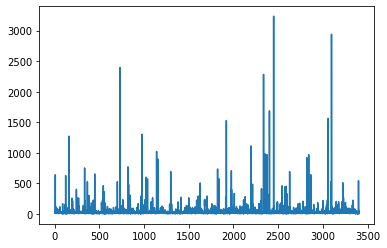

In [157]:
import matplotlib.pyplot
matplotlib.pyplot.plot(pe)

## Exception Handling

### Exceptions

Here is an example Exception.

In [159]:
while True print('Hello world')

SyntaxError: invalid syntax (<ipython-input-159-2b688bc740d7>, line 1)

- Arrow ^ pointing at the earliest point in the line where the error was detected
- The error is caused by the token preceding the arrow
- File name and line number are printed

There are different types of Exceptions.

Previous one was SyntaxError, other built-in exception types include:
- ZeroDivisionError -- division by zero
- NameError -- name not defined
- TypeError -- incorrect type
- KeyError -- key not found in dict
- IndexError -- index greater than length in list

The last line of the error message indicates what happened. Let's go over them.

In [160]:
10 * (1/0)

ZeroDivisionError: division by zero

In [162]:
4 + result*3

NameError: name 'result' is not defined

In [163]:
'1' + 1

TypeError: can only concatenate str (not "int") to str

In [164]:
d = {}
d[0]

KeyError: 0

In [165]:
l = []
l[0]

IndexError: list index out of range

The preceding part of the error message shows the context where the exception happened.

It contains a stack traceback listing source lines.

Here is an example.

In [166]:
def divide(x, y):
    return x/y

def call_divide(x, y):
    return divide(x, y)

def f(x, y):
    return call_divide(x, y)

f(1, 0)

ZeroDivisionError: division by zero

**Question:** What has caused the Error?
<br>
**Answer:**

### Try except

Sometimes exceptions are expected to happen and we want our code to handle those exceptions in a certain way. For this there is the try except statement.

Let's try these inputs.

- typing a number
- typing a non-numeric string
- typing a zero
- ending the cell by intterupting the kernel

In [170]:
while True:
    try:
        x = float(input("Please enter a number: "))
        print("inverse is:",  1/x)
        break
    except:
        print("Oops!  That was no valid number.  Try again...")

Please enter a number: s
Oops!  That was no valid number.  Try again...
Please enter a number: 15
inverse is: 0.06666666666666667


The try statement.

1. the __try clause__ (block under try:) is executed
1. if __no exception__ occurs, __except clause is skipped__
1. if __an exception occurs__, the rest of the try clause is skipped,
    - and __the first except__ clause matching the exception __is executed__,
    - if __no handler__ is found, execution stops, an error __Traceback is displayed__.
    
In this case we have used a bare except statement. This means all exception are catched including the KeyboardInterrupt.

You can specifiy which exception you want to be catched and you want to handle them.

Let's try typing an number, a non-numeric number, a zero and a keyboardintterup again.

In [171]:
while True:
    try:
        x = float(input("Please enter a number: "))
        print("inverse is:",  1/x)
        break
    except ValueError:
        print("Oops!  That was no valid number.  Try again...")
    except ZeroDivisionError:
        print("Oops! Cannot divide by 0!")
    except:
        print("Something else went wrong")
        raise
        break

Please enter a number: 0
Oops! Cannot divide by 0!
Please enter a number: s
Oops!  That was no valid number.  Try again...
Please enter a number: asda
Oops!  That was no valid number.  Try again...
Please enter a number: 123514
inverse is: 8.096248198584776e-06


else and finally are usefull to define clean-up action.
- ```else``` statements are executed __only if__ no exceptions occur in ```try``` block.
- ```finally``` statements are __always__ executed.

else clause avoids accidentally catching an exception.

In [172]:
def divide(x, y):
    try:
        result = x / y
    except ZeroDivisionError:
        print("division by zero!")
    else:
        print("result is", result)
    finally:
        print("executing finally clause")
        
divide(2,0)

division by zero!
executing finally clause


In [173]:
divide(2,1)

result is 2.0
executing finally clause


In [175]:
divide("a","b")

executing finally clause


TypeError: unsupported operand type(s) for /: 'str' and 'str'

Let's do another case.

In [176]:
total = 0
numbers = [1,2,3,"a", "b", "c", 5, 6, 7]

for number in numbers:
    total += number
    
total

TypeError: unsupported operand type(s) for +=: 'int' and 'str'

We cannot add up strings to a number.

If we want to have the total of the numbers in the list we can ignore the strings.

You can use the bare except statement. As long as you are mindful about that it catches all exceptions it's fine. For a script you operate yourself it can be fine.

In [178]:
total = 0

for number in numbers:
    try:
        total +=number
    except:
        pass
total

24

### Summary

> #### try except
If an error is encountered, a try block code execution is stopped and transferred
down to the except block. 
```python
try:
    total += number
except:
    pass
```

> #### try except else finally
In addition to using an except block after the try block, you can also use the
finally block. The code in the finally block will be executed regardless of whether an exception
occurs. The else code is executed in case the try statement was a succes.
```python
try:
    result = x / y
except ZeroDivisionError:
    print("division by zero!")
else:
    print("result is", result)
finally:
    print("executing finally clause")
```

### RUN ME

Please run the below code snippet. It is required for running tests for your solution.

In [ ]:
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  FAIL '
    print(('%s got: %s expected: %s' % (prefix, repr(got), repr(expected))))

In [ ]:
test('a', 'ab')
test('a', 'a')

### Exercises

#### Exercise 1 - Fix it Multiply

We want to multiple the values of a and b of the dictionary. 

Can you help?

In [184]:
data = {"a": 10, "b": 20}

answer = data[a] * data["b"] 

# TEST
print("fix_it_1")
test(answer, 200)

NameError: name 'a' is not defined

In [191]:
data = {"a": 10, "b": 20}


# Answer 1
# answer = data["a"] * data["b"] 

# answer 2
# Nik Faiz
try:
    answer = data[a] * data["b"] 
except NameError:
    answer = data["a"] * data["b"] 

# TEST
print("fix_it_1")
test(answer, 200)

fix_it_1
===== OK ====
     got: 200 
expected: 200



#### Exercise 2 - Fix it Numbers

We want to extend numbers with another list and then get the sum. 

Can you help?

In [181]:
numbers = [1,2,3,4]
numbers = numbers.extend([5,6,7,8])

answer = sum(numbers)

# TEST
print("fix_it_numbers")
test(answer, 36)

TypeError: 'NoneType' object is not iterable

In [201]:
   
try:
    numbers = [1,2,3,4]
    numbers = numbers.extend([5,6,7,8])
    answer = sum(numbers)
except:
    numbers = [1,2,3,4]
    numbers.extend([5,6,7,8])
    answer = sum(numbers)
    
# TEST
print("fix_it_numbers")
test(answer, 36)

fix_it_numbers
==== OK ====
     got: 36 
expected: 36



#### Exercise 3 - Fix it Open

We try to read the contents of data/names_raw.txt into a string.

Can you help?

In [ ]:
import os

In [202]:
with open(os.path.join(data, "names_raw.txt"), 'a') as f:
    content = f.read()
    
# TEST
print("fix_it_open")
test(content, 'The names are:\n\nJeremy\nJan\nAkmal')

TypeError: expected str, bytes or os.PathLike object, not dict

In [208]:
# Nik Faiz
try:
    with open(os.path.join(data, "names_raw.txt"), 'a') as f:
        content = f.read()
except:
    with open(os.path.join("data", "names_raw.txt"), 'r') as f:
        content = f.read()

    
# TEST
print("fix_it_open")
test(content, 'The names are:\n\nJeremy\nJan\nAkmal')

fix_it_open
=========== OK ===========
     got: 'The names are:\n\nJeremy\nJan\nAkmal' 
expected: 'The names are:\n\nJeremy\nJan\nAkmal'



#### Exercise 4 - Try salaries

Have a look at the data/salaries.txt file

Load it into a list of dictionaries and use try catch to handle the non-dictionary lines.

In [ ]:
salaries = ## your code
        
# TEST
print("try_salaries")
from answers import the_salaries
test(salaries, the_salaries)

In [223]:
with open(os.path.join("data", "salaries.txt"),'r') as f:
    salaries = []
    for i in f:
        try:
            salaries.append(json.loads(i))
        except:
            pass
        
# TEST
print("try_salaries")
from answers import the_salaries
test(salaries, the_salaries)

try_salaries
=========== OK ===========
     got: [{'name': 'John', 'salary': 5000, 'years_employed': 4}, {'name': 'Lee', 'salary': 4000, 'years_employed': 3}, {'name': 'Alex', 'salary': 3000, 'years_employed': 7}, {'name': 'John', 'salary': 3000, 'years_employed': 8}, {'name': 'Lauren', 'salary': 6000, 'years_employed': 5}] 
expected: [{'name': 'John', 'salary': 5000, 'years_employed': 4}, {'name': 'Lee', 'salary': 4000, 'years_employed': 3}, {'name': 'Alex', 'salary': 3000, 'years_employed': 7}, {'name': 'John', 'salary': 3000, 'years_employed': 8}, {'name': 'Lauren', 'salary': 6000, 'years_employed': 5}]



## Object Oriented Programming

Object-oriented Programming, or OOP for short, is a programming paradigm in which properties and behaviours are bundled into objects.

We will define a class Student. A class is a blue-print for an object. After defining the class Student there is only one Student class and you can create many Student objects out of that class.

Then we create a child class PythonStudent. The child class inherits all the properties from its parent and has it's own functionalities additionally.

In [236]:
class Student:
    def __init__(self,name,grades = []): # Constructor method __init__
        self.name = name
        self.grades = grades

In [237]:
jeremy = Student("Jeremy", [10,4,5])

In [239]:
jeremy.grades

[10, 4, 5]

Now copy paste code above and add this dunder method `__repr__`

In [243]:
class Student:
    # Constructor method __init__
    def __init__(self,name,grades = []): 
        self.name = name
        self.grades = grades
    
    # return object representation
    def __repr__(self): 
        return "{}:{}".format(self.name,self.grades)
        

In [244]:
jeremy = Student("Jeremy", [10,4,5])
print(jeremy)

Jeremy:[10, 4, 5]


Now Jeremy is represented by the string you defined.

We will extend this class with an average methods the returns the average grade of the student.

You can copy paste again and add the average function.

In [245]:
class Student:
    # Constructor method __init__
    def __init__(self,name,grades = []): 
        self.name = name
        self.grades = grades
    
    # return object representation
    def __repr__(self): 
        return "{}:{}".format(self.name,self.grades)
    
    def average(self):
        return round(sum(self.grades)/len(self.grades),2)

In [246]:
jeremy = Student("Jeremy", [10,4,5])
jeremy.average()

6.33

In OOP there is the concept of **heritance**. You can make a class that is the child of another class.

We will define a class PythonStudent.

In [248]:
class PythonStudent(Student):
    def can_program(self):
        return True

In [249]:
akmal = PythonStudent("Akmal", [10, 20])
akmal

Akmal:[10, 20]

In [250]:
akmal.average()

15.0

In [251]:
akmal.can_program()

True

In [255]:
jan = PythonStudent("Jan", [30,20,15])
print(jan)

Jan:[30, 20, 15]


In [256]:
students = [jeremy, jan, akmal]
students

[Jeremy:[10, 4, 5], Jan:[30, 20, 15], Akmal:[10, 20]]

We can sort the students based on their average.

In [257]:
sorted(students,key = lambda x : x.average()) 
# you are calling "average method"

[Jeremy:[10, 4, 5], Akmal:[10, 20], Jan:[30, 20, 15]]

We can filter the Python students.

In [260]:
[n for n in students if isinstance(n,Student)]
[n for n in students if isinstance(n,PythonStudent)]

[Jan:[30, 20, 15], Akmal:[10, 20]]

Well done!

### Summary

> #### class 
Python is an Object Oriented Programming language (OOP). This means that almost all the code is implemented using a special construct called classes. Programmers use classes to keep related things together. When defining a child class it will inherit the methods from the parent class. 

```python
class Student:
    
    def __init__(self, name, grades=[]):
        self.name = name
        self.grades = grades
        
    def __repr__(self):
        return "{}:{}".format(self.name, self.grades)
    
    def average(self):
        return round(sum(self.grades) / len(self.grades), 2)
    

class PythonStudent(Student):
    
    def can_program(self):
        return True
```

### RUN ME

Please run the below code snippet. It is required for running tests for your solution.

In [ ]:
def test(got, expected):
    if got == expected:
        prefix = ' OK '
    else:
        prefix = '  FAIL '
    print(('%s got: %s expected: %s' % (prefix, repr(got), repr(expected))))

In [ ]:
test('a', 'ab')
test('a', 'a')

### Exercises

The CEO of your company happens to have a kid who is totally into Pokemon! For this reason he is very interested in finding out more about these Pokemon for himself. The thing is.. all these Pokemons are hidden away in files and spread out over different continents and countries folders. Oh no, what a bummer.

Ambitious as you are and on the verge of locking down that next promotion you walk in and say: 

> _"Calm down, I have just finished my Python-Fundamentals course, let me handle this."_

Use your Python skills in browsing folder structure, lists, dictionaries, reading from csv and writing to Excel to provide those insights and totally save the day!

Have a look the the pokeworld folder inside the data folder.

The folder structure is like this: continent/country/pokemon.txt

Each file represents a pokemon and inside the file is the description.

#### Exercise 1 - Get pokemon info

Get the continent, country, name and description for the pokemon in pokeworld/Asia/Malaysia/Wooper.txt

Hints: help(str.split), with open()

In [262]:
import os
pokefile = os.path.join("data", "pokeworld/Asia/Malaysia/Wooper.txt")
pokefile

'data\\pokeworld/Asia/Malaysia/Wooper.txt'

In [263]:
lst = pokefile.split("/")
lst[-1].split('.')[0]

'Wooper'

In [264]:
lst

['data\\pokeworld', 'Asia', 'Malaysia', 'Wooper.txt']

In [278]:
lst = pokefile.split("/")

continent = lst[-3]
country = lst[-2]
name = lst[-1].split('.')[0]
with open(pokefile) as f:
    description = f.read()


# TEST
print("get_pokemon_info")
from answers import wooper_desc
test(continent,"Asia")
test(country, "Malaysia")
test(name,"Wooper")
test(description,wooper_desc)


get_pokemon_info
====== OK ======
     got: 'Asia' 
expected: 'Asia'

======== OK ========
     got: 'Malaysia' 
expected: 'Malaysia'

======= OK =======
     got: 'Wooper' 
expected: 'Wooper'

=========== OK ===========
     got: 'Wooper usually lives in water. However, it occasionally comes\nout onto land in search of food. On land, it coats its body with\na gooey, toxic film.' 
expected: 'Wooper usually lives in water. However, it occasionally comes\nout onto land in search of food. On land, it coats its body with\na gooey, toxic film.'



#### Exercise 2 - Create a pokemon class

Create a pokemon class which has three methods:
- \_\_init\_\_(self, pokefile) -- assign self.name, self.continent, self.country and self.description with contents from the file
- \_\_repr\_\_(self) -- represent a pokemon like 'Wooper from Malaysia, Asia'
- is_big_data(self) -- if there is 'Apache' or 'Hadoop' in self.description return True

In [298]:
class Pokemon():
    
    def __init__(self,pokefile):
        path = pokefile.split("/")
        self.continent = path[-3]
        self.country = path[-2]
        self.name = path[-1].split('.')[0]
        with open(pokefile) as f:
            self.description = f.read()
    
    def __repr__(self):
        return "{} from {}, {}".format(self.name,self.country,self.continent)
    
    def is_big_data(self):
        if ('Apache' in self.description) or ('Hadoop' in self.description):
            return True
        else :
            return False
# TEST
print("create_pokemon_class")
pokefile = os.path.join("data", "pokeworld/Asia/Malaysia/Wooper.txt")
pokefile2 = os.path.join("data", "pokeworld/Asia/Thailand/Hive.txt")

wooper = Pokemon(pokefile)
hive = Pokemon(pokefile2)

test(wooper.__repr__(), 'Wooper from Malaysia, Asia')
test(wooper.is_big_data(), False)
test(hive.is_big_data(), True)

create_pokemon_class
=========== OK ===========
     got: 'Wooper from Malaysia, Asia' 
expected: 'Wooper from Malaysia, Asia'

====== OK =====
     got: False 
expected: False

===== OK =====
     got: True 
expected: True



#### Exercise 3 -  Load all pokemons

Now that we have defined the Pokemon class we can make a list of all the pokemon.

Hints: glob.glob, Pokemon(pokefile)

In [ ]:
## your code here

pokemons = ## your code here

# TEST
print("load_all_pokemons")
test(len(pokemons), 750)
test(type(pokemons[0]), Pokemon)

In [309]:
import glob,os

path = os.path.join("data","pokeworld")
pokefiles = glob.glob('{}/**/*.txt'.format(path),recursive = True)
print(pokefiles)
# pokemons = [Pokemon(i) for i in pokefiles]

# TEST
print("load_all_pokemons")
test(len(pokemons), 750)
test(type(pokemons[0]), Pokemon)

['data\\pokeworld\\Asia\\China\\Aerodactyl.txt', 'data\\pokeworld\\Asia\\China\\Ariados.txt', 'data\\pokeworld\\Asia\\China\\Articuno.txt', 'data\\pokeworld\\Asia\\China\\Bergmite.txt', 'data\\pokeworld\\Asia\\China\\Diggersby.txt', 'data\\pokeworld\\Asia\\China\\Dragonair.txt', 'data\\pokeworld\\Asia\\China\\Exeggcute.txt', 'data\\pokeworld\\Asia\\China\\Flabébé.txt', 'data\\pokeworld\\Asia\\China\\Grumpig.txt', 'data\\pokeworld\\Asia\\China\\Lillipup.txt', 'data\\pokeworld\\Asia\\China\\Magby.txt', 'data\\pokeworld\\Asia\\China\\Magnezone.txt', 'data\\pokeworld\\Asia\\China\\Mudkip.txt', 'data\\pokeworld\\Asia\\China\\Murkrow.txt', 'data\\pokeworld\\Asia\\China\\Ninetales.txt', 'data\\pokeworld\\Asia\\China\\Ninjask.txt', 'data\\pokeworld\\Asia\\China\\Noctowl.txt', 'data\\pokeworld\\Asia\\China\\Pelipper.txt', 'data\\pokeworld\\Asia\\China\\Pidgeot.txt', 'data\\pokeworld\\Asia\\China\\Plusle.txt', 'data\\pokeworld\\Asia\\China\\Politoed.txt', 'data\\pokeworld\\Asia\\China\\Sneasel.t

IndexError: list index out of range

#### Exercise 4 - Provide insights

Now that we have a list of pokemon, let's answer some questions!

1. In which country is Pikachu?
2. How many pokemons in Malaysia?
3. How many pokemons in Asia?
4. Which continent has the most pokemons?
5. Which country has least pokemons?
6. Which countries have bigdata?

4.1 In which country is Pikachu?

In [307]:
pikachu = [p for p in pokemons if p.name == "Pikachu"][0]
pikachu.country

IndexError: list index out of range

4.2 How many pokemons in Malaysia?

In [ ]:
malaysians = [p for p in pokemons if p.country == "Malaysia"] # remember that 'pokemons' are objects

len(malaysians) 

4.3 How many pokemons in Asia?

In [ ]:
asians = [p for p in pokemons if p.continent == "Asia"]

len(asians)

4.4 Which continent has the most pokemons?

Hints: 
- make a dictionary continents for the count
- continents.setdefault
- sorted(continens.items(), key=... , reverse=True)

In [ ]:
continents = {}

for p in pokemons:
    continents.setdefault(p.continent, 0) # if p.continent not found, insert 0
    continents[p.continent] += 1

sorted(continents.items(), key=lambda x: x[-1], reverse=True)[0]

4.5 Which country has the least pokemon?

In [ ]:
countries = {}

for p in pokemons:
    countries.setdefault(p.country, 0)
    countries[p.country] +=1
    
sorted(countries.items(), key=lambda x:x[-1])[0]

4.6 Which countries have big data?

Hints: set() to get unique values of a list.

In [ ]:
bigdata = set([p.country for p in pokemons if p.is_big_data()])
bigdata

# Well done! Congrats on completing Python Fundamentals!

In [310]:
f= open('file6.txt','w')
f.write(""hey!"")

SyntaxError: invalid syntax (<ipython-input-310-2f0f0e46fce4>, line 2)